In [59]:
# import libraries

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy

In [60]:
# set display settings

warnings.simplefilter(action='ignore', category=RuntimeWarning)
pd.set_option("display.max_rows", None)
pd.set_option('display.max_columns', None)

In [11]:
# specify columns, datatypes, and load full consolidated sdss dataset

# load column names from file into a list
sdss_headers = pd.read_csv('../data/processed/sdss_full.csv.gz', compression='gzip', header=0, index_col=0, nrows=0).columns.tolist()

# specify groups of columns
object_identifiers = ['dr7objid', 'dr8objid', 'specobjid', 'gz2_filenumber']
object_locations = ['ra', 'dec']
object_class_labels = ['sdss_clean_class_name', 'sdss_clean_subclass_name', 'gz2_subclass_name', 'elodie_spectral_type']
object_binary_labels = [label for label in sdss_headers if 'flag' in label]
object_filters = ['score', 'petroR90_r']
object_features = ['redshift_final', 'redshift_noqso', 'redshift_elodie',
                   'u_s', 'g_s', 'r_s', 'i_s', 'z_s',
                   'u_p', 'g_p', 'r_p', 'i_p', 'z_p',
                   'elodie_color_index', 'elodie_temperature', 'elodie_metallicity']

# create a datatype dictionary for object_identifiers
object_dtypes = {col: 'string' for col in object_identifiers}

# load full consolidated sdss dataset
sdss_full = pd.read_csv('../data/processed/sdss_full.csv.gz', compression='gzip', header=0, dtype=object_dtypes)

/tmp/ipykernel_329/3708292460.py:21: DtypeWarning: Columns (10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  sdss_full = pd.read_csv('../data/processed/sdss_full.csv.gz', compression='gzip', header=0, dtype=object_dtypes)


In [4]:
# inspect the imported data
 
 # display some data
display(sdss_full.head(3))
display(sdss_full.tail(3))
display(sdss_full.sample(10))
 
# inspect dataframe
print(sdss_full.shape)
print(sdss_full.info())
for identifier in object_identifiers:
    print(f"\nTop Value Counts:  {sdss_full[identifier].value_counts().nlargest(5)}")

,dr7objid,dr8objid,specobjid,gz2_filenumber,ra,dec,sdss_clean_class_name,sdss_clean_subclass_name,gz2_subclass_name,elodie_spectral_type,gz1_flag_spiral,gz1_flag_elliptical,gz1_flag_uncertain,gz2_flag_smooth,gz2_flag_features_or_disk,gz2_flag_star_or_artifact,gz2_flag_edgeon_yes,gz2_flag_edgeon_no,gz2_flag_bar_yes,gz2_flag_bar_no,gz2_flag_spiral_yes,gz2_flag_spiral_no,gz2_flag_bulge_none1,gz2_flag_bulge_small,gz2_flag_bulge_medium,gz2_flag_bulge_large,gz2_flag_odd_yes,gz2_flag_odd_no,gz2_flag_round_circular,gz2_flag_round_medium,gz2_flag_round_cigar,gz2_flag_feature_ring,gz2_flag_feature_lens_or_arc,gz2_flag_feature_disturbed,gz2_flag_feature_irregular,gz2_flag_feature_other,gz2_flag_feature_merger,gz2_flag_feature_dust_lane,gz2_flag_bulge_round,gz2_flag_bulge_boxy,gz2_flag_bulge_none2,gz2_flag_arms_tight,gz2_flag_arms_medium,gz2_flag_arms_loose,gz2_flag_arms_1,gz2_flag_arms_2,gz2_flag_arms_3,gz2_flag_arms_4,gz2_flag_arms_many,gz2_flag_arms_unsure,score,petroR90_r,redshift_final,redshift_noqso,redshift_elodie,u_s,g_s,r_s,i_s,z_s,u_p,g_p,r_p,i_p,z_p,elodie_color_index,elodie_temperature,elodie_metallicity
0,588007006336254064,1237651252584448100,693716010653476864,192933,236.355530,54.820911,galaxy,STARFORMING,SBc2l,unclassified,True,False,False,False,True,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,0.850861,10.064850,0.080127,0.0,0.0,6.013997,19.66714,43.23034,61.21994,73.57887,18.91253,17.53665,16.81467,16.43992,16.18453,NaN,NaN,NaN
1,588007006336254083,1237651252584448112,693718759432546304,<NA>,236.342000,54.802830,galaxy,unclassified,unclassified,unclassified,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.850861,6.995347,0.193371,0.0,0.0,4.234163,11.95987,31.28475,46.43085,56.40972,19.66911,18.16584,17.27259,16.84296,16.55850,NaN,NaN,NaN
2,587729226614112406,1237651252584251555,693718209676732416,32264,235.891464,55.133472,galaxy,AGN,SBc?t,unclassified,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.863360,10.959250,0.040399,0.0,0.0,18.203950,60.73151,129.97640,179.21480,215.18610,17.46699,15.83618,15.09113,14.70903,14.41906,NaN,NaN,NaN


,dr7objid,dr8objid,specobjid,gz2_filenumber,ra,dec,sdss_clean_class_name,sdss_clean_subclass_name,gz2_subclass_name,elodie_spectral_type,gz1_flag_spiral,gz1_flag_elliptical,gz1_flag_uncertain,gz2_flag_smooth,gz2_flag_features_or_disk,gz2_flag_star_or_artifact,gz2_flag_edgeon_yes,gz2_flag_edgeon_no,gz2_flag_bar_yes,gz2_flag_bar_no,gz2_flag_spiral_yes,gz2_flag_spiral_no,gz2_flag_bulge_none1,gz2_flag_bulge_small,gz2_flag_bulge_medium,gz2_flag_bulge_large,gz2_flag_odd_yes,gz2_flag_odd_no,gz2_flag_round_circular,gz2_flag_round_medium,gz2_flag_round_cigar,gz2_flag_feature_ring,gz2_flag_feature_lens_or_arc,gz2_flag_feature_disturbed,gz2_flag_feature_irregular,gz2_flag_feature_other,gz2_flag_feature_merger,gz2_flag_feature_dust_lane,gz2_flag_bulge_round,gz2_flag_bulge_boxy,gz2_flag_bulge_none2,gz2_flag_arms_tight,gz2_flag_arms_medium,gz2_flag_arms_loose,gz2_flag_arms_1,gz2_flag_arms_2,gz2_flag_arms_3,gz2_flag_arms_4,gz2_flag_arms_many,gz2_flag_arms_unsure,score,petroR90_r,redshift_final,redshift_noqso,redshift_elodie,u_s,g_s,r_s,i_s,z_s,u_p,g_p,r_p,i_p,z_p,elodie_color_index,elodie_temperature,elodie_metallicity
1654165,<NA>,1237658613593997533,9259471051523641344,<NA>,177.50007,50.211641,quasar,unclassified,unclassified,unclassified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.807279,NaN,1.076416,0.231599,0.0,0.765539,1.052253,1.874948,1.917074,2.357079,21.84895,21.91097,21.59686,21.60826,21.09701,0.0,0.0,0.0
1654166,<NA>,1237658613594063054,9259459231773642752,<NA>,177.79391,50.208232,unclassified,unclassified,unclassified,unclassified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.819832,NaN,2.060357,-0.004214,0.0,7.819283,5.829438,6.240019,6.629135,8.703038,20.83662,20.68300,20.50494,20.39749,20.39611,0.0,0.0,0.0
1654167,<NA>,1237658613594063058,9259460331285270528,<NA>,177.79678,50.375821,quasar,BROADLINE,unclassified,unclassified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.819832,NaN,1.856644,0.123349,0.0,0.191132,1.780057,1.906872,2.832188,3.034446,22.02470,21.56175,21.59132,21.17899,21.09313,0.0,0.0,0.0


,dr7objid,dr8objid,specobjid,gz2_filenumber,ra,dec,sdss_clean_class_name,sdss_clean_subclass_name,gz2_subclass_name,elodie_spectral_type,gz1_flag_spiral,gz1_flag_elliptical,gz1_flag_uncertain,gz2_flag_smooth,gz2_flag_features_or_disk,gz2_flag_star_or_artifact,gz2_flag_edgeon_yes,gz2_flag_edgeon_no,gz2_flag_bar_yes,gz2_flag_bar_no,gz2_flag_spiral_yes,gz2_flag_spiral_no,gz2_flag_bulge_none1,gz2_flag_bulge_small,gz2_flag_bulge_medium,gz2_flag_bulge_large,gz2_flag_odd_yes,gz2_flag_odd_no,gz2_flag_round_circular,gz2_flag_round_medium,gz2_flag_round_cigar,gz2_flag_feature_ring,gz2_flag_feature_lens_or_arc,gz2_flag_feature_disturbed,gz2_flag_feature_irregular,gz2_flag_feature_other,gz2_flag_feature_merger,gz2_flag_feature_dust_lane,gz2_flag_bulge_round,gz2_flag_bulge_boxy,gz2_flag_bulge_none2,gz2_flag_arms_tight,gz2_flag_arms_medium,gz2_flag_arms_loose,gz2_flag_arms_1,gz2_flag_arms_2,gz2_flag_arms_3,gz2_flag_arms_4,gz2_flag_arms_many,gz2_flag_arms_unsure,score,petroR90_r,redshift_final,redshift_noqso,redshift_elodie,u_s,g_s,r_s,i_s,z_s,u_p,g_p,r_p,i_p,z_p,elodie_color_index,elodie_temperature,elodie_metallicity
1648363,<NA>,1237662236943909074,3302292266898450432,<NA>,218.186290,7.828251,star,K3,unclassified,K2V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.870524,NaN,0.000057,0.000000,0.000058,15.234220,54.253220,109.877700,143.297500,162.654700,19.93850,18.13488,17.38753,17.09622,16.93215,0.871,4955.0,-0.23
952848,<NA>,1237657630602297590,7530082456214720512,<NA>,182.432350,53.423301,unclassified,unclassified,unclassified,unclassified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.880188,NaN,1.232016,0.301642,0.000000,14.630250,14.188520,18.111590,17.510680,15.928540,19.61260,19.55543,19.29378,19.24026,19.33947,0.000,0.0,0.00
1114488,<NA>,1237671142018449412,578748319698806784,<NA>,176.274260,1.378034,quasar,BROADLINE,unclassified,unclassified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.975924,NaN,1.137589,0.000000,0.000000,63.870430,63.590240,74.238140,74.199460,69.014910,18.12209,17.99688,17.78581,17.78174,17.81122,0.000,0.0,0.00
544599,588023047477330194,1237667293725524271,2573856727141214208,235713,137.215454,19.759964,galaxy,STARFORMING,Sc?t,unclassified,False,False,True,False,True,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,0.834060,6.142231,0.066597,0.000000,0.000000,6.594904,19.059830,38.144330,53.857100,68.177670,18.72454,17.37067,16.78099,16.45668,16.21701,NaN,NaN,NaN
1281632,<NA>,1237662302437245283,9560020907554263040,<NA>,221.970270,46.416145,quasar,unclassified,unclassified,unclassified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.928757,NaN,2.943061,0.045224,0.000000,2.598459,3.235110,4.088786,4.457162,4.551342,21.66922,20.91310,20.72402,20.55853,20.63879,0.000,0.0,0.00
139898,587732484356046928,1237658205580951634,1086606700703672320,55868,169.572052,49.715622,galaxy,unclassified,Ser,unclassified,True,False,False,False,True,False,False,False,False,True,True,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,0.897221,7.342307,0.096375,0.000000,0.000000,6.850522,17.751220,43.932050,70.316920,94.142700,19.38355,17.73878,16.83901,16.38227,16.04243,NaN,NaN,NaN
799351,<NA>,1237658802037784748,7693401164642275328,<NA>,184.120570,55.014269,quasar,BROADLINE,unclassified,unclassified,NaN,NaN,NaN

(1654168, 68)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654168 entries, 0 to 1654167
Data columns (total 68 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   dr7objid                      658334 non-null   string 
 1   dr8objid                      1654168 non-null  string 
 2   specobjid                     1654168 non-null  string 
 3   gz2_filenumber                236466 non-null   string 
 4   ra                            1654168 non-null  float64
 5   dec                           1654168 non-null  float64
 6   sdss_clean_class_name         1654168 non-null  object 
 7   sdss_clean_subclass_name      1654168 non-null  object 
 8   gz2_subclass_name             1654168 non-null  object 
 9   elodie_spectral_type          1654168 non-null  object 
 10  gz1_flag_spiral               658334 non-null   object 
 11  gz1_flag_elliptical           658334 non-null   object 
 12  gz1_flag_uncer

Text(0.5, 1.0, 'Distribution of SDSS objects across the sky, by superclass')

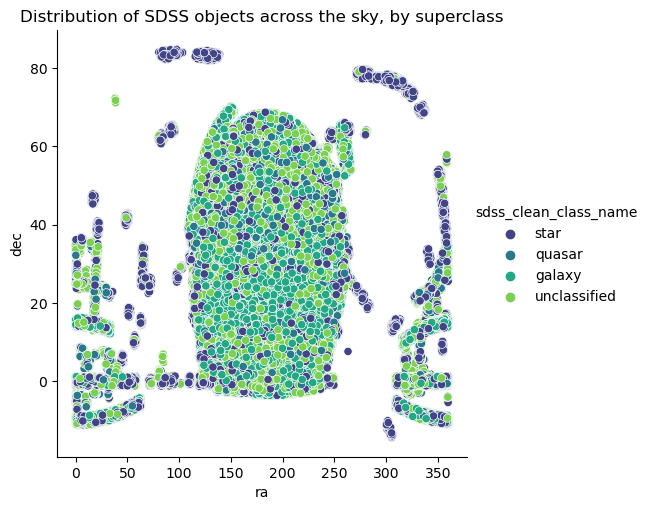

In [4]:
# investigate physical distribution of superclasses

sns.relplot(x='ra', y='dec', hue='sdss_clean_class_name', data=sdss_full.sample(frac=0.2), palette='viridis')
plt.title('Distribution of SDSS objects across the sky, by superclass')


----------sdss_clean_class_name----------
	The number of rows with empty values is: 0
	The number of unique labels is: 4
	The % of the most common labels for column: sdss_clean_class_name
galaxy          34.326380
unclassified    28.910304
star            24.431013
quasar          12.332302
Name: count, dtype: float64

----------sdss_clean_subclass_name----------
	The number of rows with empty values is: 0
	The number of unique labels is: 171
	The % of the most common labels for column: sdss_clean_subclass_name
unclassified      54.664399
STARFORMING        9.275600
BROADLINE          8.997816
F9                 3.774949
F5                 3.246889
A0                 1.914497
F3/F5V (30743)     1.720744
STARBURST          1.514417
G2                 0.983999
K3                 0.927354
Name: count, dtype: float64

----------gz2_subclass_name----------
	The number of rows with empty values is: 0
	The number of unique labels is: 815
	The % of the most common labels for column: gz2_subcl

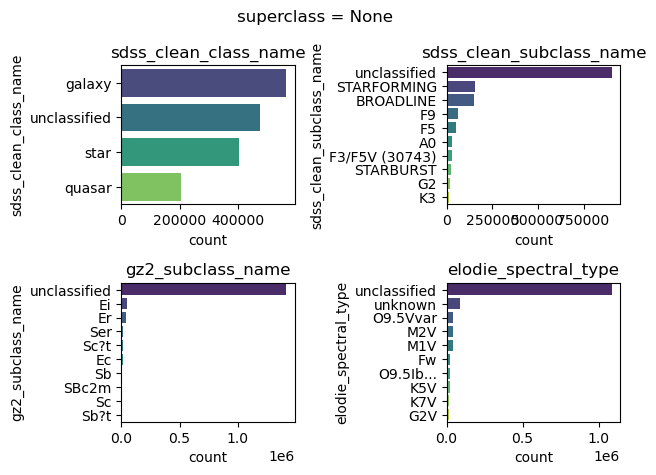

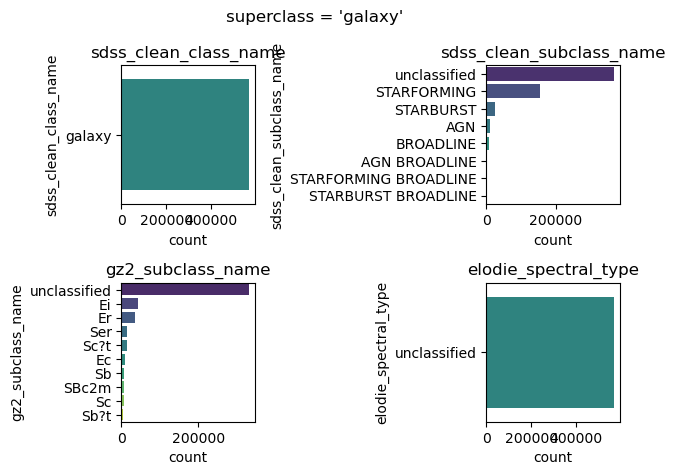

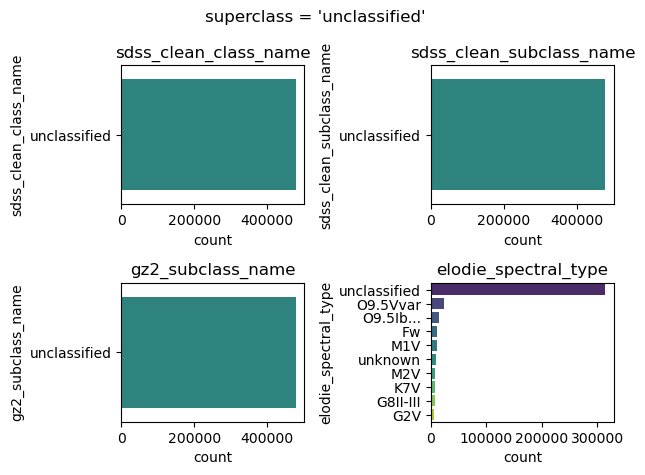

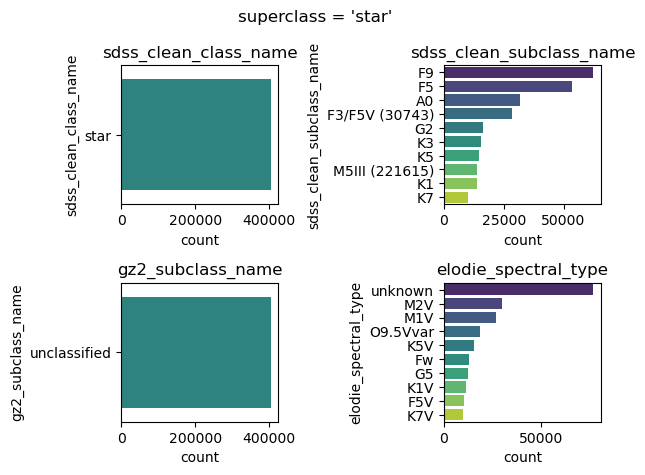

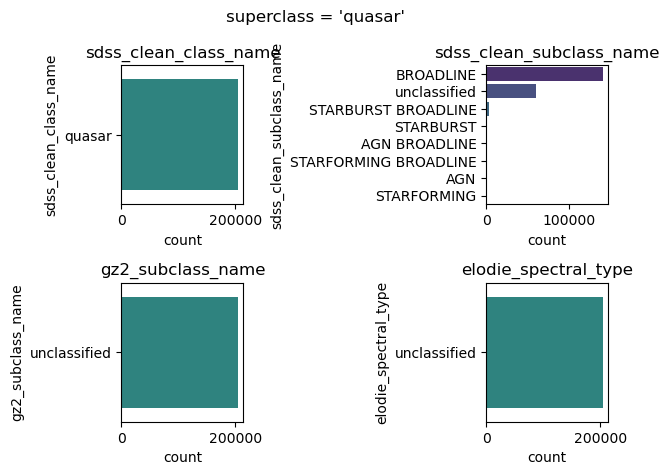

In [5]:
"""# investigate superclasses & subclasses (categorical labels)

# create a helper function for investigating a column w/ categorical data
def investigate_classes(df, column):
    print(f"\n----------" + label + "----------")
    print(f"\tThe number of rows with empty values is: {df[column].isna().sum()}")
    print(f"\tThe number of unique labels is: {len(df[column].unique())}")
    print(f"\tThe % of the most common labels for column: {100 * df[column].value_counts().head(10) / len(df[column])}")

# summarize label counts for each categorical data column
for label in object_class_labels:
    investigate_classes(sdss_full, label)

# create a helper function to plot the value counts of the top-10 labels for each categorical class
# in a subset of data (based on the sdss_clean_class_name)
def plot_categorical_counts(superclass=None):
    df = sdss_full
    if superclass:
        df = sdss_full[sdss_full['sdss_clean_class_name'] == superclass]
    fig, axes = plt.subplots(nrows=2, ncols=2)
    for i, ax in enumerate(axes.flatten()):
        data = df[object_class_labels[i]]
        sns.countplot(y=data, ax=ax, order=data.value_counts().index[:10], palette='viridis')
        ax.set_title(f"{object_class_labels[i]}")
    plt.suptitle(f"{superclass = }")
    plt.tight_layout()
    plt.show()

# plot the value counts of the top-10 labels for all and each categorical class
for label in [None] + sdss_full['sdss_clean_class_name'].unique().tolist():
    plot_categorical_counts(label)"""

In [96]:
# clean sdss_full table based on gz2 labels

# drop rows that with gz2 labels indicative of stars
sdss_full = sdss_full[sdss_full['gz2_subclass_name'] != 'A']

In [13]:
# label engineering - simplify gz2 labels

# create a mapping dictionary to capture simplified gz2 labels
gz2_map = {
    '.*Er.*': 'Er', # elliptical with low eccentricity (round)
    '.*Ei.*': 'Ee', # elliptical with intermediate eccentricity 
    '.*Ec.*': 'Ec', # elliptical with high eccentricity (cigar-shaped)
    '.*Sa.*': 'Sa', # spiral with large bulge
    '.*Sb.*': 'Sb', # spiral with medium bulge
    '.*Sc.*': 'Sc', # spiral with small bulge
    '.*Sd.*': 'Sd', # spiral with no bulge
    '.*SBa.*': 'SBa', # barred-spiral with large bulge
    '.*SBb.*': 'SBb', # barred-spiral with medium bulge
    '.*SBc.*': 'SBc', # barred-spiral with small bulge
    '.*SBd.*': 'SBd', # barred-spiral with no bulge
    '.*Ser.*': 'Er', # edge-on spiral with round bulge
    '.*Seb.*': 'Er', # edge-on spiral with boxy bulge
    '.*Sen.*': 'Er', # edge-on spiral with no bulge
}

# add a new column with simplified gz2 labels and insert it as the 10th column
sdss_full['gz2_subclass_hubble'] = sdss_full['gz2_subclass_name'].replace(gz2_map, regex=True)
sdss_full.insert(9, 'gz2_subclass_hubble', sdss_full.pop('gz2_subclass_hubble'))

print(sdss_full[sdss_full['sdss_clean_class_name'] == 'galaxy']['gz2_subclass_hubble'].value_counts())

gz2_subclass_hubble
unclassified    331350
Er               58983
Ee               46752
Sc               43848
Sb               27711
SBc              25686
SBb              17991
Ec               10378
Sd                2981
SBd                901
Sa                 527
SBa                146
Name: count, dtype: int64


In [14]:
# label engineering - simplify star labels

# create mapping dictionaries to capture simplified star labels
stellar_MK_class_map = {
    '.*O.*': 'O', # blue
    '.*B.*': 'B', # bluish white
    '.*A.*': 'A', # white
    '.*F.*': 'F', # yellowish white
    '.*G.*': 'G', # yellow
    '.*K.*': 'K', # light orange
    '.*M.*': 'M', # orangeish red
    '.*D.*': 'D', # white dwarf
    '.*WD.*': 'D', # white dwarf
    '.*S.*': 'C', # carbon star
    '.*C.*': 'C', # carbon star
    '.*L.*': 'd', # cool (red or brown) dwarf
    '.*T.*': 'd', # cool (red or brown) dwarf 
    '.*Y.*': 'd', # cool (red or brown) dwarf
}

# add a new column with simplified MK labels (based on SDSS subclass) and insert it as the 9th column
sdss_full['sdss_subclass_MK'] = sdss_full['sdss_clean_subclass_name'].replace(stellar_MK_class_map, regex=True)
sdss_full.insert(8, 'sdss_subclass_MK', sdss_full.pop('sdss_subclass_MK'))

# add a new column with simplified MK labels (based on elodie subclass) and insert it as the 12th column
sdss_full['elodie_subclass_MK'] = sdss_full['elodie_spectral_type'].replace(stellar_MK_class_map, regex=True)
sdss_full.insert(12, 'elodie_subclass_MK', sdss_full.pop('elodie_subclass_MK'))

# add a new column with simplified MK labels (based on both SDSS and elodie) and insert it as the 7th column
sdss_full['stellar_subclass_MK'] = sdss_full.apply(lambda row: row['sdss_subclass_MK'] \
    if row['sdss_subclass_MK'] == row['elodie_subclass_MK'] else 'unclassified', axis=1)
sdss_full.insert(7, 'stellar_subclass_MK', sdss_full.pop('stellar_subclass_MK'))

print(sdss_full[sdss_full['sdss_clean_class_name'] == 'star']['stellar_subclass_MK'].value_counts())
print(sdss_full[sdss_full['sdss_clean_class_name'] == 'star']['sdss_subclass_MK'].value_counts())
print(sdss_full[sdss_full['sdss_clean_class_name'] == 'star']['elodie_subclass_MK'].value_counts())

stellar_subclass_MK
unclassified    276326
K                50694
M                43023
G                15508
F                14849
A                 3282
B                  243
O                  199
C                    6
Name: count, dtype: int64
sdss_subclass_MK
F    164917
M     82615
K     67727
A     36580
G     34890
D     10306
d      2212
C      2101
O      1461
B      1321
Name: count, dtype: int64
elodie_subclass_MK
G          88492
unknown    77214
M          70119
K          69718
F          53207
O          27986
0           8809
A           6496
B           1966
C            123
Name: count, dtype: int64


2402 negative values
count    1.653606e+06
mean     8.657715e-01
std      8.373554e-02
min      0.000000e+00
25%      8.340176e-01
50%      8.684001e-01
75%      9.085021e-01
max      1.000000e+00
Name: score, dtype: float64


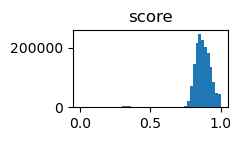

41 negative values
count    657772.000000
mean          6.066120
std          79.071275
min       -9999.000000
25%           4.732668
50%           5.929780
75%           7.611827
max         231.121800
Name: petroR90_r, dtype: float64


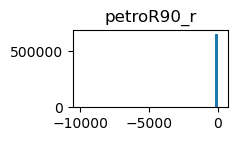

350080 negative values
count    1.653606e+06
mean     4.962981e-01
std      8.785821e-01
min     -1.011055e-02
25%      6.899664e-05
50%      8.508665e-02
75%      4.165911e-01
max      7.051930e+00
Name: redshift_final, dtype: float64


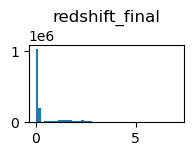

1256573 negative values
count    1.653606e+06
mean     9.178009e-02
std      2.989759e-01
min     -1.281170e-02
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.003984e+00
Name: redshift_noqso, dtype: float64


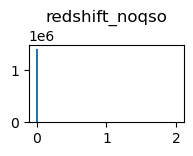

1517923 negative values
count    1.653606e+06
mean    -1.749685e-05
std      2.131646e-04
min     -3.486274e-03
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.459876e-03
Name: redshift_elodie, dtype: float64


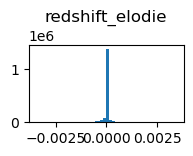

53302 negative values
count    1.653606e+06
mean     1.922194e+01
std      2.124573e+02
min     -4.542040e+02
25%      2.668576e+00
50%      6.309509e+00
75%      1.303234e+01
max      1.093949e+05
Name: u_s, dtype: float64


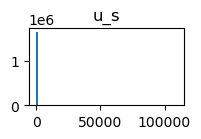

3252 negative values
count    1.653606e+06
mean     4.856371e+01
std      8.909454e+02
min     -4.542040e+02
25%      4.739988e+00
50%      1.528852e+01
75%      3.069170e+01
max      4.862328e+05
Name: g_s, dtype: float64


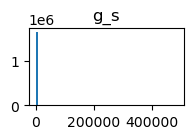

1425 negative values
count    1.653606e+06
mean     9.347006e+01
std      2.122271e+03
min     -4.542040e+02
25%      7.143427e+00
50%      3.243090e+01
75%      6.390958e+01
max      1.058207e+06
Name: r_s, dtype: float64


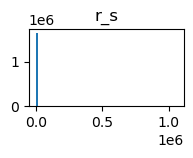

1114 negative values
count    1.653606e+06
mean     1.246776e+02
std      3.027923e+03
min     -4.542040e+02
25%      9.485633e+00
50%      4.633227e+01
75%      9.222130e+01
max      1.435664e+06
Name: i_s, dtype: float64


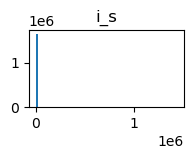

3766 negative values
count    1.653606e+06
mean     1.495997e+02
std      3.940009e+03
min     -3.392219e+02
25%      1.163046e+01
50%      5.709870e+01
75%      1.173593e+02
max      1.915441e+06
Name: z_s, dtype: float64


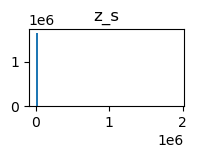

107 negative values
count    1.653606e+06
mean     1.988817e+01
std      8.061753e+01
min     -9.999000e+03
25%      1.926713e+01
50%      2.025042e+01
75%      2.164138e+01
max      3.278139e+01
Name: u_p, dtype: float64


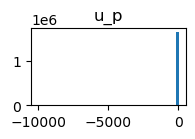

103 negative values
count    1.653606e+06
mean     1.854995e+01
std      7.908600e+01
min     -9.999000e+03
25%      1.788174e+01
50%      1.870629e+01
75%      2.076426e+01
max      3.107220e+01
Name: g_p, dtype: float64


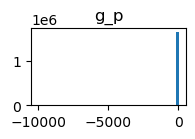

81 negative values
count    1.653606e+06
mean     1.803759e+01
std      7.013644e+01
min     -9.999000e+03
25%      1.712070e+01
50%      1.781075e+01
75%      2.031515e+01
max      3.198108e+01
Name: r_p, dtype: float64


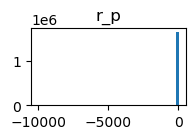

90 negative values
count    1.653606e+06
mean     1.763771e+01
std      7.392544e+01
min     -9.999000e+03
25%      1.672215e+01
50%      1.746078e+01
75%      1.997037e+01
max      3.146818e+01
Name: i_p, dtype: float64


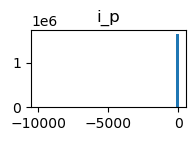

99 negative values
count    1.653606e+06
mean     1.735494e+01
std      7.753033e+01
min     -9.999000e+03
25%      1.643913e+01
50%      1.727509e+01
75%      1.976333e+01
max      3.084678e+01
Name: z_p, dtype: float64


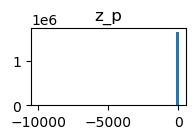

541039 negative values
count    995834.000000
mean          0.395183
std           0.536839
min          -0.199000
25%           0.000000
50%           0.000000
75%           0.704000
max           1.787000
Name: elodie_color_index, dtype: float64


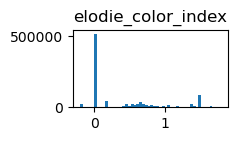

427695 negative values
count    995834.000000
mean       3132.167024
std        2945.262703
min           0.000000
25%           0.000000
50%        3717.000000
75%        5474.000000
max       13582.000000
Name: elodie_temperature, dtype: float64


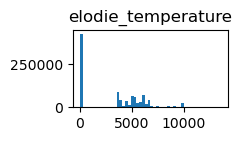

886337 negative values
count    995834.000000
mean         -0.384141
std           0.742870
min          -2.720000
25%          -0.450000
50%           0.000000
75%           0.000000
max           1.350000
Name: elodie_metallicity, dtype: float64


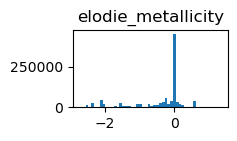

In [16]:
"""# investigate filters and features

for col in object_filters + object_features:
    print(f"{len(sdss_full[sdss_full[col] <= 0])} negative values")
    print(sdss_full[col].describe())
    plt.figure(figsize=(2, 1))
    plt.hist(x=sdss_full[col], bins=50)
    plt.title(col)
    plt.show()"""

In [97]:
# remove bad rows to geenrate a cleaned table

# create a new dataframe to store essential information
sdss_primary = copy.deepcopy(sdss_full)

# drop rows that have non-physical photometric values
sdss_primary = sdss_primary[sdss_primary['u_p'] >= 0]
sdss_primary = sdss_primary[sdss_primary['g_p'] >= 0]
sdss_primary = sdss_primary[sdss_primary['r_p'] >= 0]
sdss_primary = sdss_primary[sdss_primary['i_p'] >= 0]
sdss_primary = sdss_primary[sdss_primary['z_p'] >= 0]

# drop rows with photometric scores less than 0.8
sdss_primary = sdss_primary[sdss_primary['score'] >= 0.8]

# drop rows with impossible petrosian radii
sdss_primary = sdss_primary[~(sdss_primary['petroR90_r'] < 0)]

"""# create a helper function to remove tukey outliers (based on interquartile range)
def remove_outlier_rows(df, columns):
    for column in columns:        
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# drop tukey outliers
sdss_primary = remove_outlier_rows(sdss_primary, object_filters + object_features)"""

'# create a helper function to remove tukey outliers (based on interquartile range)\ndef remove_outlier_rows(df, columns):\n    for column in columns:        \n        q1 = df[column].quantile(0.25)\n        q3 = df[column].quantile(0.75)\n        iqr = q3 - q1\n        lower_bound = q1 - 1.5 * iqr\n        upper_bound = q3 + 1.5 * iqr\n        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]\n    return df\n\n# drop tukey outliers\nsdss_primary = remove_outlier_rows(sdss_primary, object_filters + object_features)'


---------- sdss_clean_class_name : None ----------
The number of rows with classified values is: 1089273
The number of rows with unclassified values is: 442167
The number of unique labels is: 4


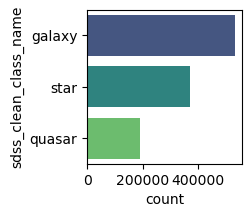


---------- gz2_subclass_hubble : galaxy ----------
The number of rows with classified values is: 222372
The number of rows with unclassified values is: 308727
The number of unique labels is: 12


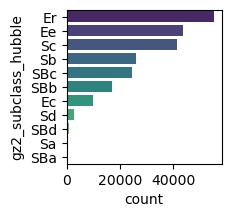


---------- stellar_subclass_MK : star ----------
The number of rows with classified values is: 117478
The number of rows with unclassified values is: 251143
The number of unique labels is: 9


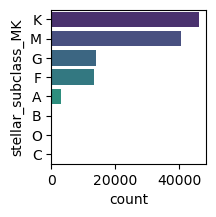

In [55]:
# investigate superclasses & simplified subclasses (categorical labels)

# create a helper function for investigating and plotting a subset from a column w/ categorical data
def investigate_clean_classes(df, column, filter=None):
    data = df[column]
    if filter:
        data = df[df['sdss_clean_class_name'] == filter][column]
    unclassified_count = data.isna().sum() + (data == 'unclassified').sum() + (data == 'unkonwn').sum()
    print(f"\n---------- {column} : {filter} ----------")
    print(f"The number of rows with classified values is: {len(data) - unclassified_count}")
    print(f"The number of rows with unclassified values is: {unclassified_count}")
    print(f"The number of unique labels is: {len(df[column].unique())}")
    data2 = data[data != 'unclassified']
    data2 = data2[data2 != 'unknown']
    plt.figure(figsize=(2, 2))
    sns.countplot(y=data2, order=data2.value_counts().index[:15], palette='viridis')
    #plt.suptitle(f"{column = }")
    #plt.tight_layout()
    plt.show()

investigate_clean_classes(sdss_primary, 'sdss_clean_class_name')
investigate_clean_classes(sdss_primary, 'gz2_subclass_hubble', 'galaxy')
investigate_clean_classes(sdss_primary, 'stellar_subclass_MK', 'star')

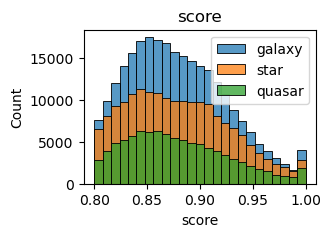

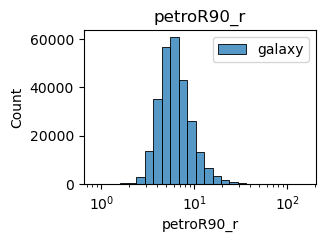

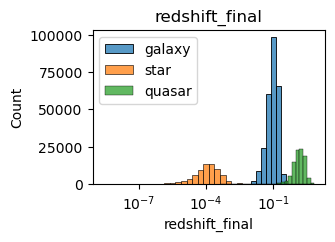

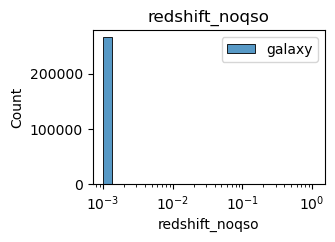

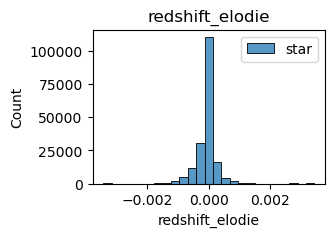

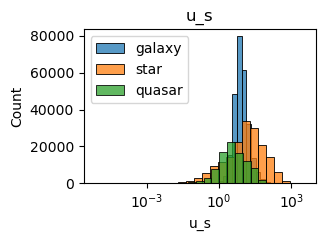

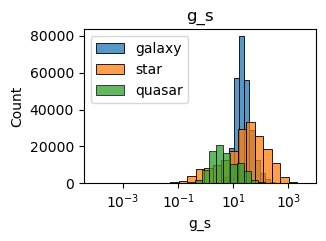

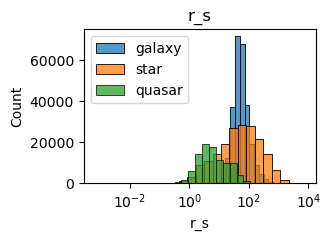

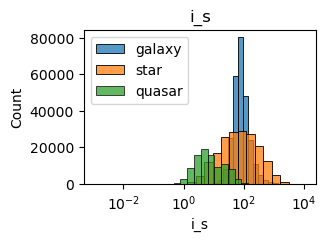

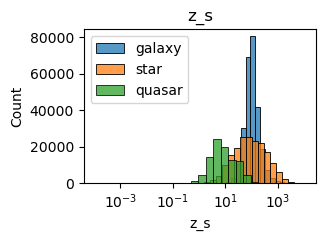

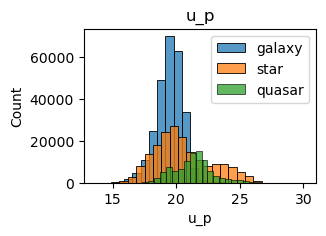

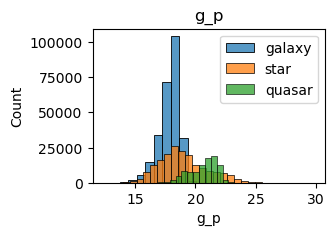

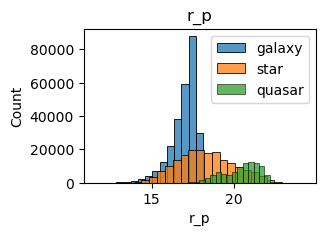

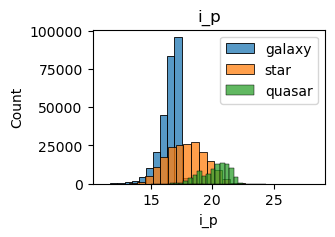

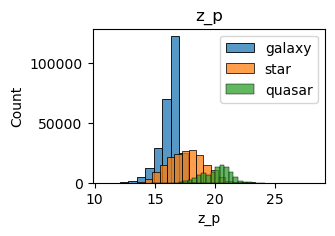

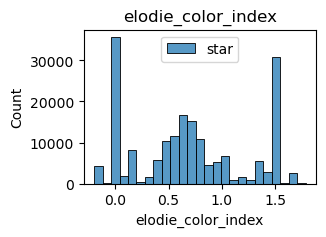

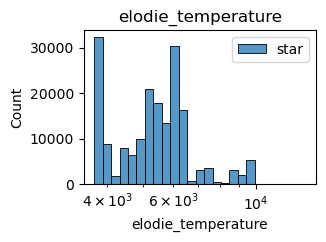

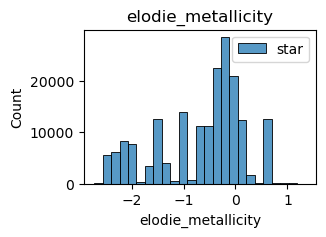

In [73]:
# investigate histograms of feature columns, color-shaded by superclass

# generate a subset dataframe
df = sdss_primary[['sdss_clean_class_name'] + object_filters + object_features]
df = df.sample(frac=0.5)

# define classes
classes = sdss_primary['sdss_clean_class_name'].unique()
classes = classes[classes != 'unclassified']

# set a color palette with distinct colors for each category
colors = sns.color_palette('bright', n_colors=len(df['sdss_clean_class_name'].unique()))

# make a list of columns with linear ranges
linear_cols = ['score, petroR90_r', 'u_p', 'g_p', 'r_p']

# iterate over columns and create separate plots
for col in object_filters + object_features:
    plt.figure(figsize=(3, 2))
    plt.xscale('linear')
    log_choice = False
    denom = df[col].min()
    if denom == 0:
        denom = 0.001
    if abs(df[col].max() / denom) > 50:
        df[col] = df[col].replace(0, 0.001)
        log_choice = True
        plt.xscale('symlog')  
    for class_label, color in zip(classes, colors):
        if ('petro' in col) | ('noqso' in col):
            if class_label == 'galaxy':
                sns.histplot(df[df['sdss_clean_class_name'] == class_label][col], bins=25, label=class_label, log_scale=log_choice)
        elif 'elodie' in col:
            if class_label == 'star':
                sns.histplot(df[df['sdss_clean_class_name'] == class_label][col], bins=25, label=class_label, log_scale=log_choice)
        else:
            sns.histplot(df[df['sdss_clean_class_name'] == class_label][col], bins=25, label=class_label, log_scale=log_choice)
    plt.title(col)
    plt.legend()
    plt.show()

<Axes: >

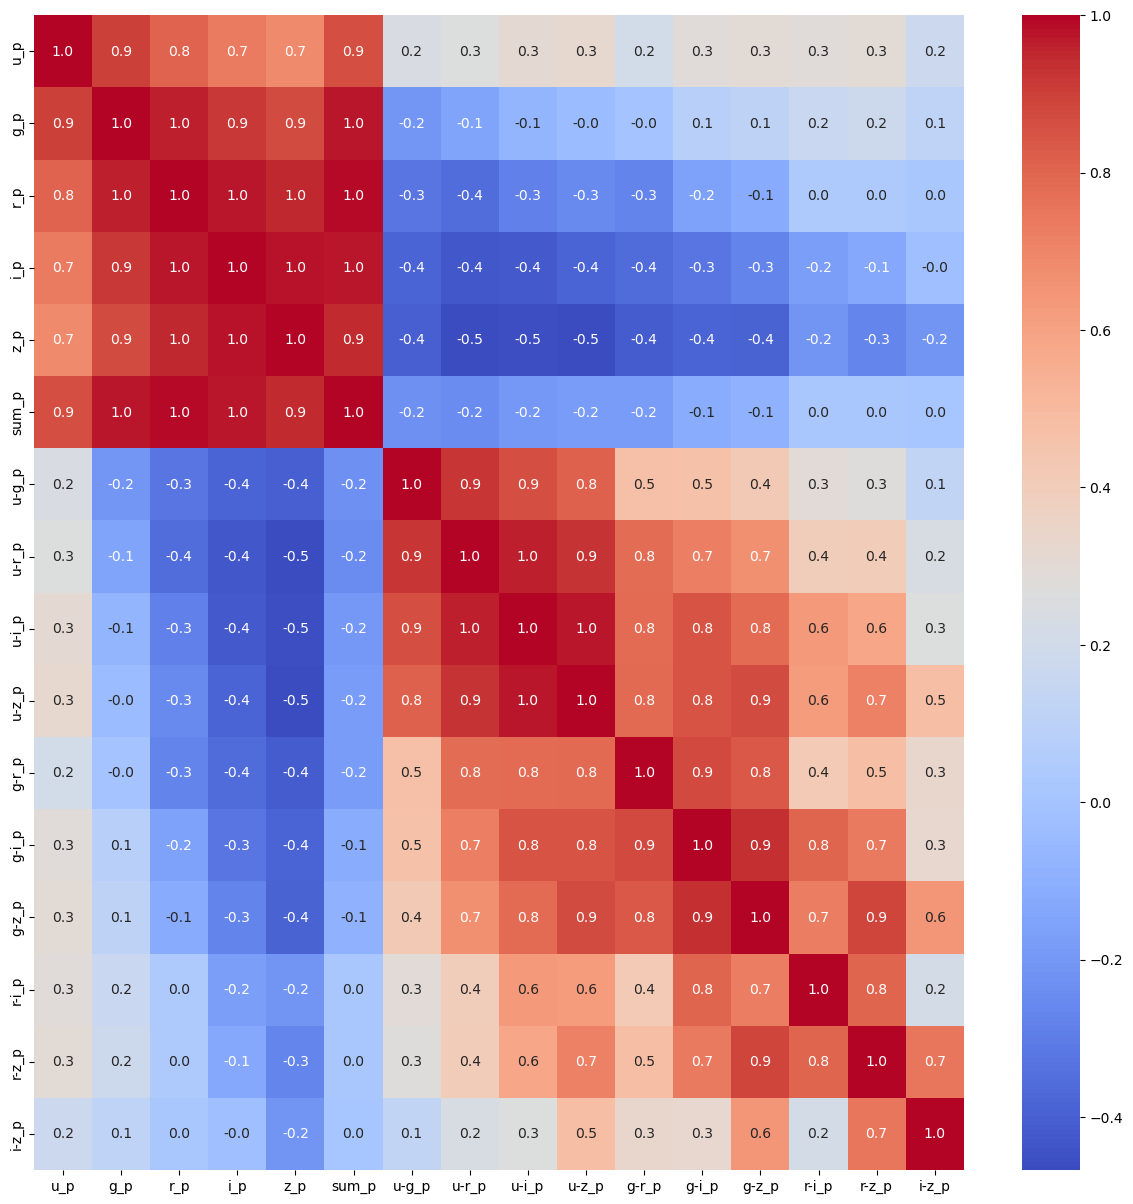

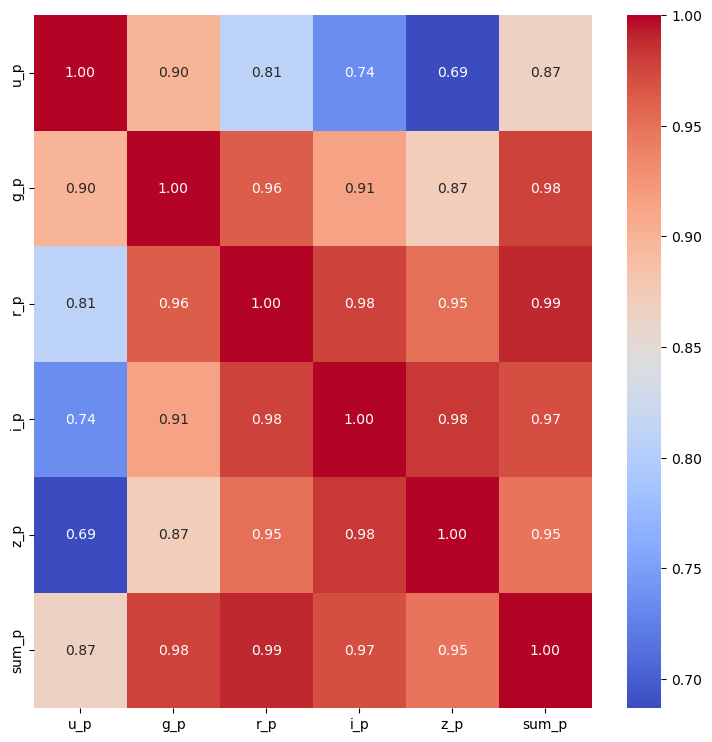

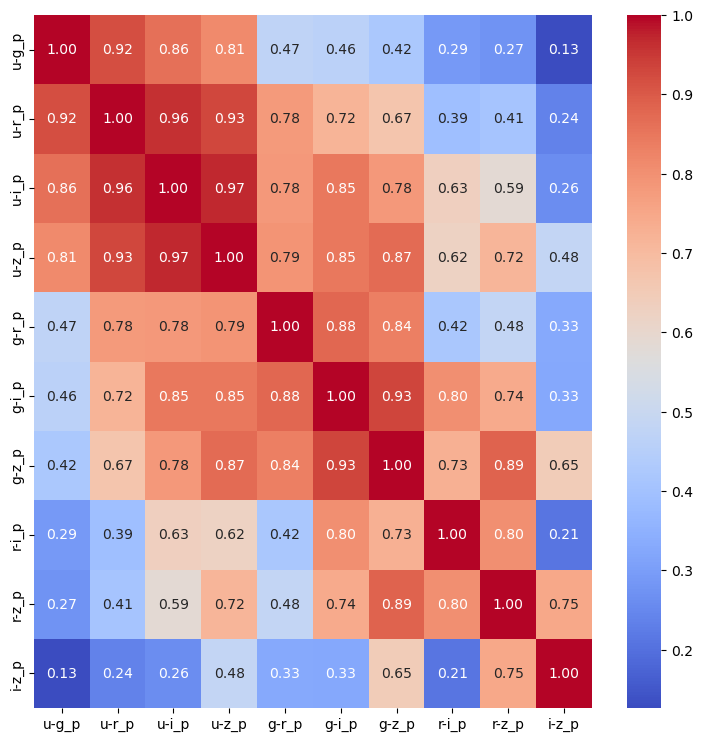

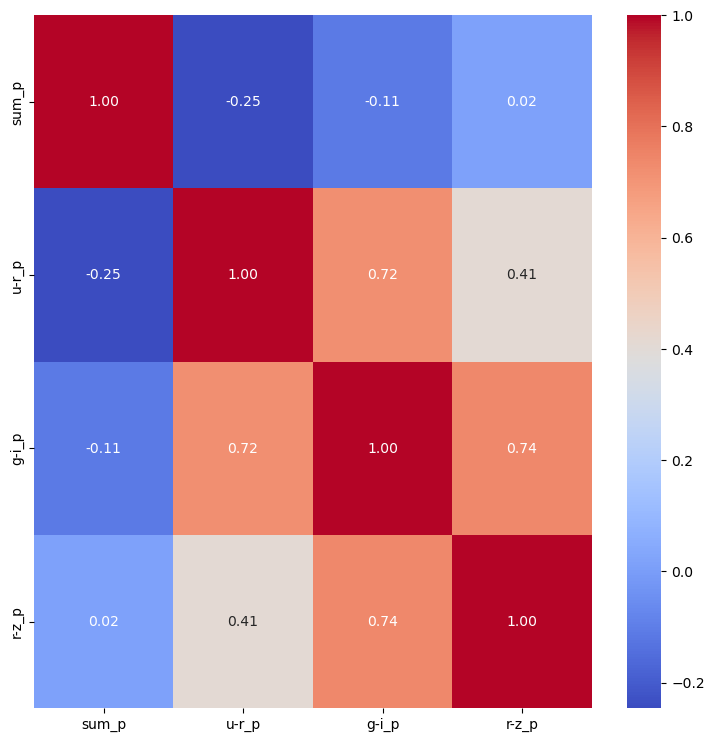

In [114]:
# investigate correlations amongst photmetric filter model magnitudes

# investigate all photometric features
features = ['u_p','g_p','r_p','i_p','z_p','sum_p','u-g_p','u-r_p','u-i_p','u-z_p','g-r_p','g-i_p','g-z_p','r-i_p','r-z_p','i-z_p']
p_correlations = sdss_primary[features].corr()
plt.figure(figsize=(15, 15))
sns.heatmap(p_correlations, annot=True, cmap='coolwarm', fmt='.1f')

# investigate original and summ photmetric features
features = ['u_p','g_p','r_p','i_p','z_p','sum_p']
p_correlations = sdss_primary[features].corr()
plt.figure(figsize=(9, 9))
sns.heatmap(p_correlations, annot=True, cmap='coolwarm', fmt='.2f')

# investigate difference photometric features
features = ['u-g_p','u-r_p','u-i_p','u-z_p','g-r_p','g-i_p','g-z_p','r-i_p','r-z_p','i-z_p']
p_correlations = sdss_primary[features].corr()
plt.figure(figsize=(9, 9))
sns.heatmap(p_correlations, annot=True, cmap='coolwarm', fmt='.2f')

# investigate selected photometric features
# NOTE: these are selected based on physical (common-sense) reasons and validated based on correlations
features = ['sum_p', 'u-r_p', 'g-i_p', 'r-z_p']
p_correlations = sdss_primary[features].corr()
plt.figure(figsize=(9, 9))
sns.heatmap(p_correlations, annot=True, cmap='coolwarm', fmt='.2f')

In [122]:
# clean up sdss_primary for ML

# specify groups of primary columns
object_identifiers = ['dr8objid']
galaxy_identifiers = ['gz2_filenumber']
object_locations = ['ra', 'dec']
object_class_labels = ['sdss_clean_class_name']
star_class_labels = ['stellar_subclass_MK']
galaxy_class_labels =['gz2_subclass_hubble']
galaxy_binary_labels = [label for label in sdss_headers if 'flag' in label]
object_features = ['redshift_final', 'sum_p', 'u-r_p', 'g-i_p', 'r-z_p']
star_features = ['elodie_color_index', 'elodie_temperature', 'elodie_metallicity']
# consider adding galaxy features:  ratio of petro_radius to petro_brightness

# truncate to primary columns
sdss_primary = sdss_primary[object_identifiers + galaxy_identifiers + object_locations + object_class_labels + star_class_labels \
    + galaxy_class_labels + galaxy_binary_labels + object_features + star_features]

# drop rows that are associated with 'unclassified' objects
sdss_primary = sdss_primary[sdss_primary['sdss_clean_class_name'] != 'unclassified']
sdss_primary = sdss_primary.reset_index(drop=True)

In [125]:
# display some data
display(sdss_primary.head(5))
display(sdss_primary.sample(5))

# inspect dataframe
print(f"\n{sdss_primary.shape = }\n")
print(f"\n{sdss_primary.info()}")

,dr8objid,gz2_filenumber,ra,dec,sdss_clean_class_name,stellar_subclass_MK,gz2_subclass_hubble,gz1_flag_spiral,gz1_flag_elliptical,gz1_flag_uncertain,gz2_flag_smooth,gz2_flag_features_or_disk,gz2_flag_star_or_artifact,gz2_flag_edgeon_yes,gz2_flag_edgeon_no,gz2_flag_bar_yes,gz2_flag_bar_no,gz2_flag_spiral_yes,gz2_flag_spiral_no,gz2_flag_bulge_none1,gz2_flag_bulge_small,gz2_flag_bulge_medium,gz2_flag_bulge_large,gz2_flag_odd_yes,gz2_flag_odd_no,gz2_flag_round_circular,gz2_flag_round_medium,gz2_flag_round_cigar,gz2_flag_feature_ring,gz2_flag_feature_lens_or_arc,gz2_flag_feature_disturbed,gz2_flag_feature_irregular,gz2_flag_feature_other,gz2_flag_feature_merger,gz2_flag_feature_dust_lane,gz2_flag_bulge_round,gz2_flag_bulge_boxy,gz2_flag_bulge_none2,gz2_flag_arms_tight,gz2_flag_arms_medium,gz2_flag_arms_loose,gz2_flag_arms_1,gz2_flag_arms_2,gz2_flag_arms_3,gz2_flag_arms_4,gz2_flag_arms_many,gz2_flag_arms_unsure,redshift_final,sum_p,u-r_p,g-i_p,r-z_p,elodie_color_index,elodie_temperature,elodie_metallicity
0,1237651252584448100,192933,236.355530,54.820911,galaxy,unclassified,SBc,True,False,False,False,True,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,0.080127,85.88830,2.09786,1.09673,0.63014,NaN,NaN,NaN
1,1237651252584448112,<NA>,236.342000,54.802830,galaxy,unclassified,unclassified,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.193371,88.50900,2.39652,1.32288,0.71409,NaN,NaN,NaN
2,1237651252584251555,32264,235.891464,55.133472,galaxy,unclassified,SBc,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.040399,77.52239,2.37586,1.12715,0.67207,NaN,NaN,NaN
3,1237651252584317089,32265,236.063721,55.035847,galaxy,unclassified,Sc,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.048782,84.18209,1.77608,0.65633,0.23047,NaN,NaN,NaN
4,1237655130907213985,<NA>,236.150100,54.775720,galaxy,unclassified,unclassified,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.066882,89.05857,1.44878,0.69195,0.46791,NaN,NaN,NaN


,dr8objid,gz2_filenumber,ra,dec,sdss_clean_class_name,stellar_subclass_MK,gz2_subclass_hubble,gz1_flag_spiral,gz1_flag_elliptical,gz1_flag_uncertain,gz2_flag_smooth,gz2_flag_features_or_disk,gz2_flag_star_or_artifact,gz2_flag_edgeon_yes,gz2_flag_edgeon_no,gz2_flag_bar_yes,gz2_flag_bar_no,gz2_flag_spiral_yes,gz2_flag_spiral_no,gz2_flag_bulge_none1,gz2_flag_bulge_small,gz2_flag_bulge_medium,gz2_flag_bulge_large,gz2_flag_odd_yes,gz2_flag_odd_no,gz2_flag_round_circular,gz2_flag_round_medium,gz2_flag_round_cigar,gz2_flag_feature_ring,gz2_flag_feature_lens_or_arc,gz2_flag_feature_disturbed,gz2_flag_feature_irregular,gz2_flag_feature_other,gz2_flag_feature_merger,gz2_flag_feature_dust_lane,gz2_flag_bulge_round,gz2_flag_bulge_boxy,gz2_flag_bulge_none2,gz2_flag_arms_tight,gz2_flag_arms_medium,gz2_flag_arms_loose,gz2_flag_arms_1,gz2_flag_arms_2,gz2_flag_arms_3,gz2_flag_arms_4,gz2_flag_arms_many,gz2_flag_arms_unsure,redshift_final,sum_p,u-r_p,g-i_p,r-z_p,elodie_color_index,elodie_temperature,elodie_metallicity
753130,1237663782601359449,<NA>,33.276054,-1.234658,star,K,unclassified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000091,96.87901,3.45324,1.40950,0.63517,1.063,4353.0,-0.47
1070363,1237658298457194676,<NA>,151.453020,5.423351,quasar,unclassified,unclassified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.895082,99.27902,0.71349,0.03450,0.07131,0.000,0.0,0.00
132515,1237655348887683238,<NA>,227.663900,55.080830,galaxy,unclassified,unclassified,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.155225,91.66845,3.31033,1.62888,0.89570,NaN,NaN,NaN
334351,1237667914348953742,236375,190.687393,19.063007,galaxy,unclassified,Sb,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.113035,85.67073,1.93563,1.07183,0.65129,NaN,NaN,NaN
648818,1237660962936324310,<NA>,130.496650,30.934949,star,unclassified,unclassified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000084,82.30494,1.43970,0.47991,0.18415,0.000,6000.0,-1.00



sdss_primary.shape = (1089273, 55)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089273 entries, 0 to 1089272
Data columns (total 55 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   dr8objid                      1089273 non-null  string 
 1   gz2_filenumber                222372 non-null   string 
 2   ra                            1089273 non-null  float64
 3   dec                           1089273 non-null  float64
 4   sdss_clean_class_name         1089273 non-null  object 
 5   stellar_subclass_MK           1089273 non-null  object 
 6   gz2_subclass_hubble           1089273 non-null  object 
 7   gz1_flag_spiral               531099 non-null   object 
 8   gz1_flag_elliptical           531099 non-null   object 
 9   gz1_flag_uncertain            531099 non-null   object 
 10  gz2_flag_smooth               222372 non-null   object 
 11  gz2_flag_features_or_disk     222372 non-null   obje

In [ ]:
# save the primary processed data to a file

sdss_primary.to_csv('../data/processed/sdss_primary.csv.gz', compression='gzip', index=False)